In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
from scipy import stats
import numpy as np

In [3]:
file = pd.read_csv("Resources/merged_videos.csv", encoding='utf-8')
file.head()

,Video Name,Channel ID,Views,Likes,Dislikes,Comments,Time of Uploading,Category
0,BARU! Keju Cheddar Anchor dari New Zealand,UCfDpWxtKc_PBOXr7gPLXLrQ,24928443,32,0,5,2023-05-16T03:21:41Z,People & Blogs
1,CHHAKKA PANJA (Full Movie) - Superhit Nepali F...,UCrzyJYtjLOTfnUur8hsr7ow,22639285,120531,0,7473,2017-01-13T01:37:07Z,Film & Animation
2,DREAMS (Full Movie) Anmol KC | Samragyee RL Sh...,UCrzyJYtjLOTfnUur8hsr7ow,16144028,125884,0,6735,2016-09-09T16:55:30Z,Film & Animation
3,Bhairav || à¤­à¥à¤°à¤¬ || Nepali Action Movie...,UCNR1KcWXj7zpWQFJtU3ddYg,11888301,92724,0,3836,2016-06-15T18:15:01Z,Film & Animation
4,å¥³å­©ä¸çµæ¢¯é­ç·å­©æ¶æå ³åï¼ä»çµæ...,UCUbw50S9E4dRDq8whoUGtsA,8537098,85433,0,2488,2023-06-17T23:00:24Z,People & Blogs


In [4]:
category_file = file.groupby(["Category"])
category_file.head()

,Video Name,Channel ID,Views,Likes,Dislikes,Comments,Time of Uploading,Category
0,BARU! Keju Cheddar Anchor dari New Zealand,UCfDpWxtKc_PBOXr7gPLXLrQ,24928443,32,0,5,2023-05-16T03:21:41Z,People & Blogs
1,CHHAKKA PANJA (Full Movie) - Superhit Nepali F...,UCrzyJYtjLOTfnUur8hsr7ow,22639285,120531,0,7473,2017-01-13T01:37:07Z,Film & Animation
2,DREAMS (Full Movie) Anmol KC | Samragyee RL Sh...,UCrzyJYtjLOTfnUur8hsr7ow,16144028,125884,0,6735,2016-09-09T16:55:30Z,Film & Animation
3,Bhairav || à¤­à¥à¤°à¤¬ || Nepali Action Movie...,UCNR1KcWXj7zpWQFJtU3ddYg,11888301,92724,0,3836,2016-06-15T18:15:01Z,Film & Animation
4,å¥³å­©ä¸çµæ¢¯é­ç·å­©æ¶æå ³åï¼ä»çµæ...,UCUbw50S9E4dRDq8whoUGtsA,8537098,85433,0,2488,2023-06-17T23:00:24Z,People & Blogs
...,...,...,...,...,...,...,...,...
296,Butterfly Wonderland | Uniquely Scottsdale,UC4OdfHtdQf7LSVigj-v0Beg,585030,30,0,3,2021-12-08T16:39:14Z,Travel & Events
325,Water Mission - Tommy&#39;s Express Car Wash,UCJ5hYPQ2x3un_jjtM6egPrQ,320448,66,0,1,2019-08-05T14:32:06Z,Autos & Vehicles
346,Here&#39;s Why Toyota&#39;s RAV4 2023 Will Sho...,UCqFYonMui0nemny21XPhIgg,222000,1759,0,108,2022-06-25T19:15:00Z,Autos & Vehicles
354,TÆ° Lá»nh TQLC Nga á» Kherson cÃ³ thá» ÄÃ£...,UCdioDuMh5_afhGJTAkbQjdQ,203657,0,0,0,2023-02-03T21:00:22Z,Nonprofits & Activism


In [5]:
category_totals = file.groupby("Category")[["Views", "Likes", "Dislikes", "Comments"]].sum()
category_totals

,Views,Likes,Dislikes,Comments
Category,,,,
Autos & Vehicles,1272487,51974,0,2634
Comedy,2533345,192169,0,2517
Education,2993008,43728,0,3769
Entertainment,44663079,962347,0,54182
Film & Animation,72575888,726717,0,24568
Gaming,18019125,875244,0,40979
Howto & Style,20818769,296716,0,20916
Music,10384719,181536,0,24787
News & Politics,16076125,332988,0,50538


In [6]:
# Convert Views and Likes columns to millions
million_factor = 1e-6  
thousand_factor = 1e-3

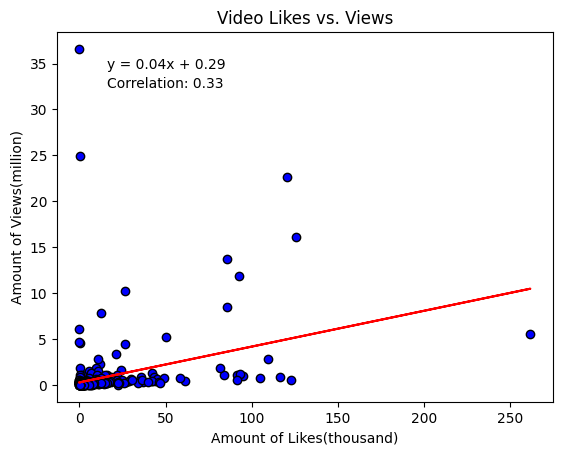

In [7]:
file["Views (Millions)"] = file["Views"] * million_factor
file["Likes (Thousands)"] = file["Likes"] * thousand_factor
# Sample data
x = file["Likes (Thousands)"]
y = file["Views (Millions)"]
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#Create Scatter Plots
plt.scatter(x, y, marker="o", color="blue", edgecolors = "black" )
plt.xlabel("Amount of Likes(thousand)")
plt.ylabel("Amount of Views(million)")
plt.title("Video Likes vs. Views")
# Plot the regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color="red", label="Regression Line")
# Display the linear regression equation and correlation coefficient on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = f"Correlation: {r_value:.2f}"
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes)
plt.savefig("output/1.png")
plt.show()

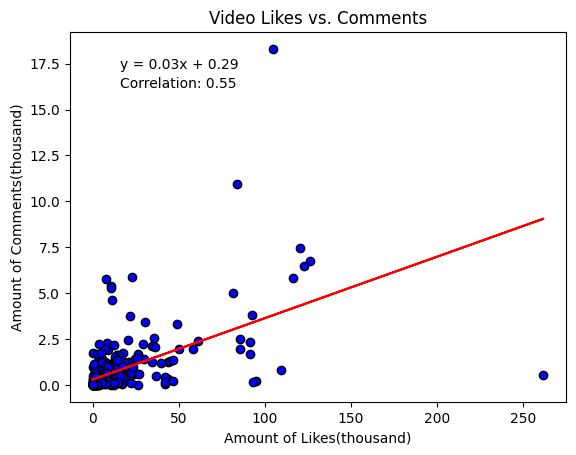

In [8]:
file["Comments (Thousands)"] = file["Comments"] * thousand_factor
file["Likes (Thousands)"] = file["Likes"] * thousand_factor
#Sample data
x = file["Likes (Thousands)"]
y = file["Comments (Thousands)"]
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#Create Scatter Plots
plt.scatter(x, y, marker="o", color="blue", edgecolors = "black" )
plt.xlabel("Amount of Likes(thousand)")
plt.ylabel("Amount of Comments(thousand)")
plt.title("Video Likes vs. Comments")
# Plot the regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color="red", label="Regression Line")
# Display the linear regression equation and correlation coefficient on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = f"Correlation: {r_value:.2f}"
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes)
plt.savefig("output/2.png")
plt.show()

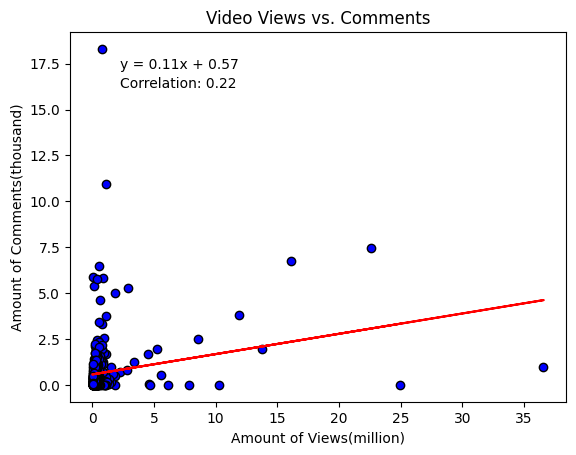

In [9]:
#Sample data
x = file["Views (Millions)"]
y = file["Comments (Thousands)"]
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#Create Scatter Plots
plt.scatter(x, y, marker="o", color="blue", edgecolors = "black" )
plt.xlabel("Amount of Views(million)")
plt.ylabel("Amount of Comments(thousand)")
plt.title("Video Views vs. Comments")
# Plot the regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color="red", label="Regression Line")
# Display the linear regression equation and correlation coefficient on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = f"Correlation: {r_value:.2f}"
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes)
plt.savefig("output/3.png")
plt.show()

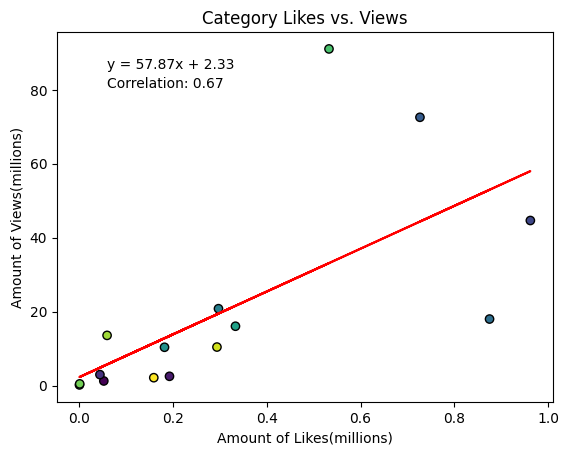

In [10]:
# Convert Views and Likes columns to millions
category_totals["Views (Millions)"] = category_totals["Views"] * million_factor
category_totals["Likes (Millions)"] = category_totals["Likes"] * million_factor
# Sample data
x = category_totals["Likes (Millions)"]
y = category_totals["Views (Millions)"]
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#Create Scatter Plots
plt.scatter(x, y, marker="o", c=range(len(x)), cmap='viridis', edgecolors = "black" )
plt.xlabel("Amount of Likes(millions)")
plt.ylabel("Amount of Views(millions)")
plt.title("Category Likes vs. Views")
# Plot the regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color="red", label="Regression Line")
# Display the linear regression equation and correlation coefficient on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = f"Correlation: {r_value:.2f}"
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes)
plt.savefig("output/4.png", bbox_inches='tight')
plt.show()

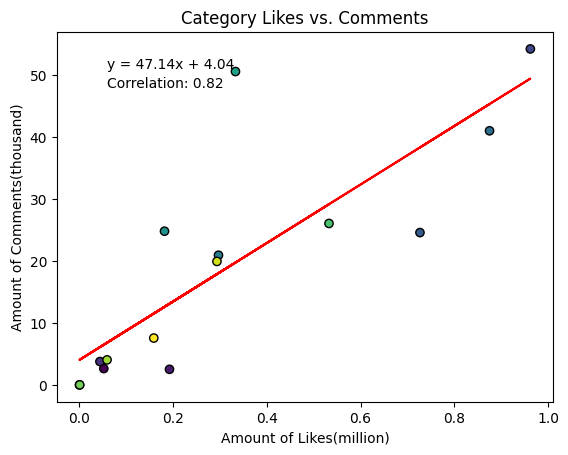

In [11]:
# Convert Likes and Comments columns to desired units
category_totals["Comments (Thousands)"] = category_totals["Comments"] * thousand_factor
# Sample data
x = category_totals["Likes (Millions)"]
y = category_totals["Comments (Thousands)"]
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#Create Scatter Plots
plt.scatter(x, y, marker="o", c=range(len(x)), cmap='viridis', edgecolors = "black" )
plt.xlabel("Amount of Likes(million)")
plt.ylabel("Amount of Comments(thousand)")
plt.title("Category Likes vs. Comments")
# Plot the regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color="red", label="Regression Line")
# Display the linear regression equation and correlation coefficient on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = f"Correlation: {r_value:.2f}"
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes)
plt.savefig("output/5.png")
plt.show()

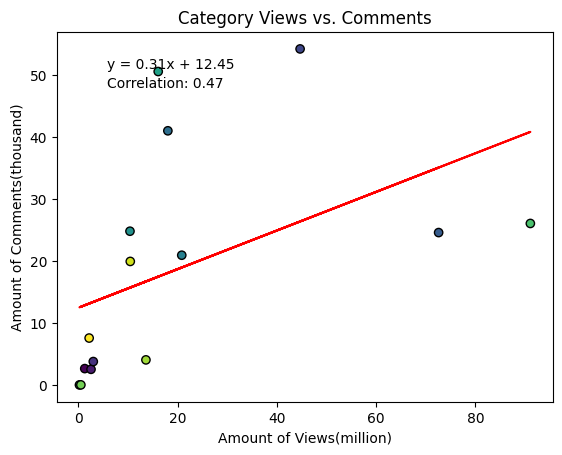

In [12]:
# Sample data
x = category_totals["Views (Millions)"]
y = category_totals["Comments (Thousands)"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#Create Scatter Plots
plt.scatter(x, y, marker="o", c=range(len(x)), cmap='viridis', edgecolors = "black" )
plt.xlabel("Amount of Views(million)")
plt.ylabel("Amount of Comments(thousand)")
plt.title("Category Views vs. Comments")
# Plot the regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color="red", label="Regression Line")
# Display the linear regression equation and correlation coefficient on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = f"Correlation: {r_value:.2f}"
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, correlation, transform=plt.gca().transAxes)
plt.savefig("output/6.png")
plt.show()

In [13]:
Comments = category_file["Comments"].sum()

Views = category_file["Views"].mean()

likes = category_file["Likes"].mean()


# Assemble the resulting series into a single summary DataFrame.
Q1_df= pd.DataFrame({"Comments":Comments, "Views":Views, "Likes": likes})

Q1_df

,Comments,Views,Likes
Category,,,
Autos & Vehicles,2634,2.120812e+05,8662.333333
Comedy,2517,4.222242e+05,32028.166667
Education,3769,2.720916e+05,3975.272727
Entertainment,54182,4.378733e+05,9434.774510
Film & Animation,24568,3.819784e+06,38248.263158
Gaming,40979,3.833856e+05,18622.212766
Howto & Style,20916,9.463077e+05,13487.090909
Music,24787,7.417656e+05,12966.857143
News & Politics,50538,1.448300e+05,2999.891892


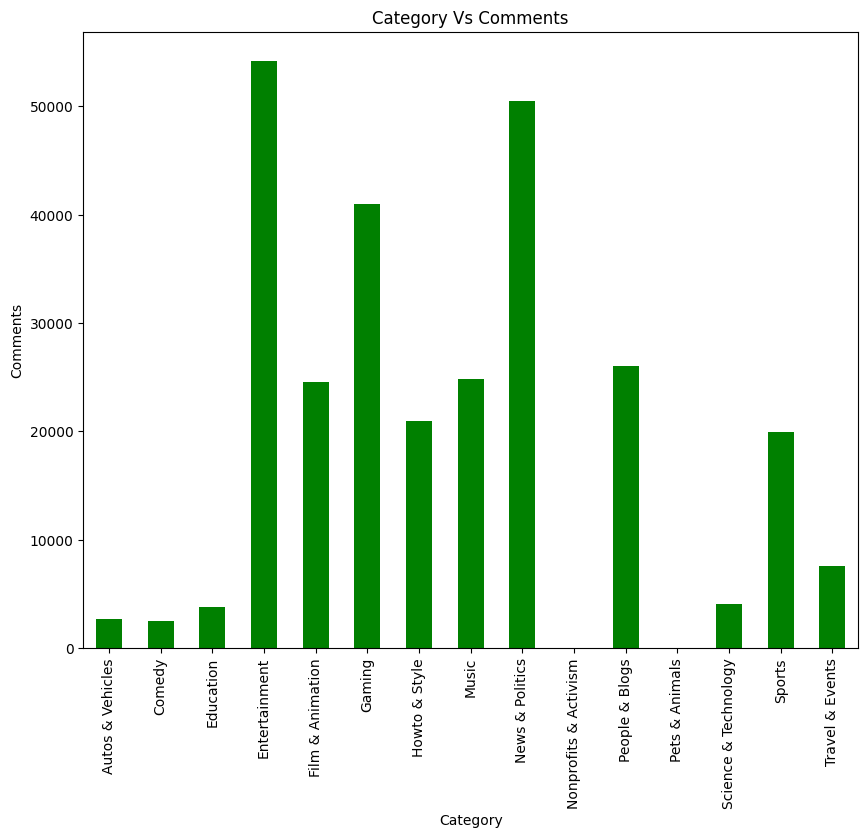

In [14]:
#plot Bar chat

comments_df= Q1_df.groupby(["Category"]).mean()["Comments"]

plot_bar_comments = comments_df.plot(kind = "bar",figsize=(10,8), color='g')


plot_bar_comments.set_ylabel("Comments")
plot_bar_comments.set_xlabel("Category")
plot_bar_comments.set_title("Category Vs Comments")
plt.show()

#plt.tight_layout()
#plt.savefig("Bar plot comments")


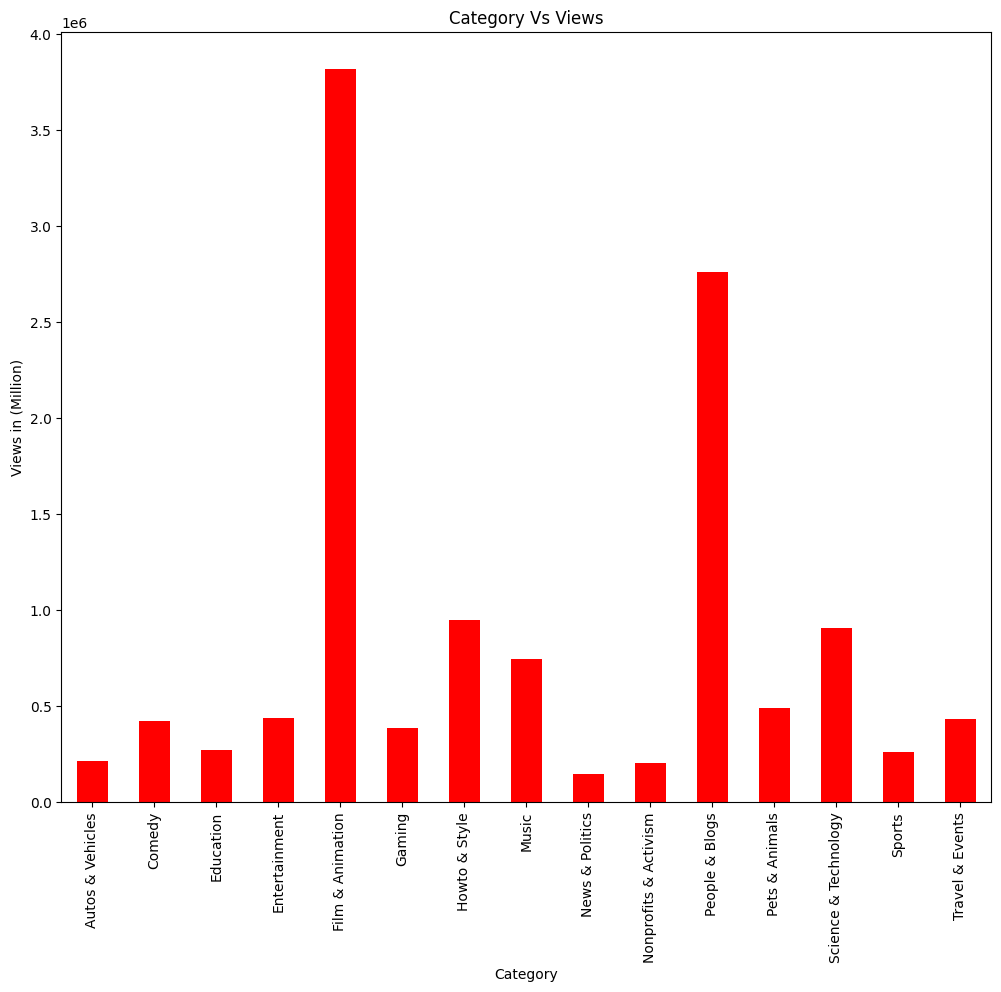

In [15]:
views_df= Q1_df.groupby(["Category"]).mean()["Views"]

plot_bar =views_df.plot(kind ="bar",figsize=(12,10), color='r',)


plot_bar.set_ylabel("Views in (Million)")
plot_bar.set_xlabel("Category")
plot_bar.set_title("Category Vs Views")
plt.show()

In [17]:
# Count how many videos there are in each category
video_counts = file["Category"].value_counts()

# Create a new DataFrame with the category names and their corresponding counts
category_counts_df = pd.DataFrame({'Category': video_counts.index, 'Video Count': video_counts.values})

# Add a new column to store the total number of likes for each category
category_likes = category_file["Likes"].sum()
category_counts_df['Total Likes'] = category_counts_df['Category'].map(category_likes)

# Calculate the average number of likes per video for each category
category_avg_likes = likes
category_counts_df['Average Likes per Video'] = category_counts_df['Category'].map(category_avg_likes)

# Print the table
print(category_counts_df)

                 Category  Video Count  Total Likes  Average Likes per Video
0         News & Politics          111       332988              2999.891892
1           Entertainment          102       962347              9434.774510
2                  Gaming           47       875244             18622.212766
3                  Sports           40       293477              7336.925000
4          People & Blogs           33       532581             16138.818182
5           Howto & Style           22       296716             13487.090909
6        Film & Animation           19       726717             38248.263158
7    Science & Technology           15        58969              3931.266667
8                   Music           14       181536             12966.857143
9               Education           11        43728              3975.272727
10                 Comedy            6       192169             32028.166667
11       Autos & Vehicles            6        51974              8662.333333

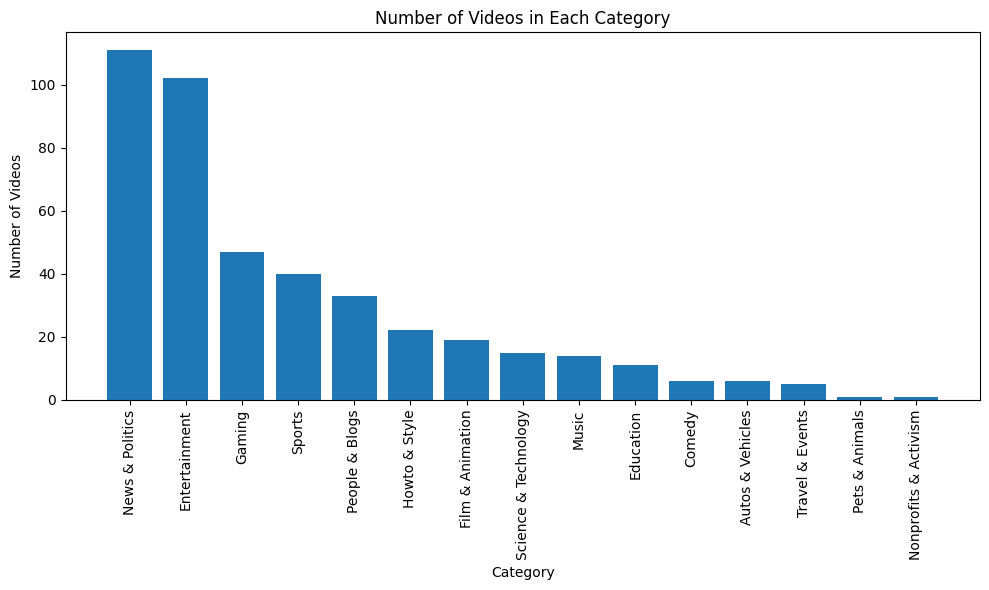

In [23]:

# Create a new DataFrame with the category names and their corresponding counts
category_counts_df = pd.DataFrame({'Category': video_counts.index, 'Video Count': video_counts.values})

# Sort the DataFrame by 'Video Count' in descending order
category_counts_df = category_counts_df.sort_values(by='Video Count', ascending=False)

# Create a bar graph for the number of videos per category
plt.figure(figsize=(10, 6))
plt.bar(category_counts_df['Category'], category_counts_df['Video Count'])
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.title('Number of Videos in Each Category')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the bar graph to a file (e.g., save it as a PNG image)
plt.savefig('output/videos_per_category_bar_graph.png')

# Display the bar graph
plt.show()

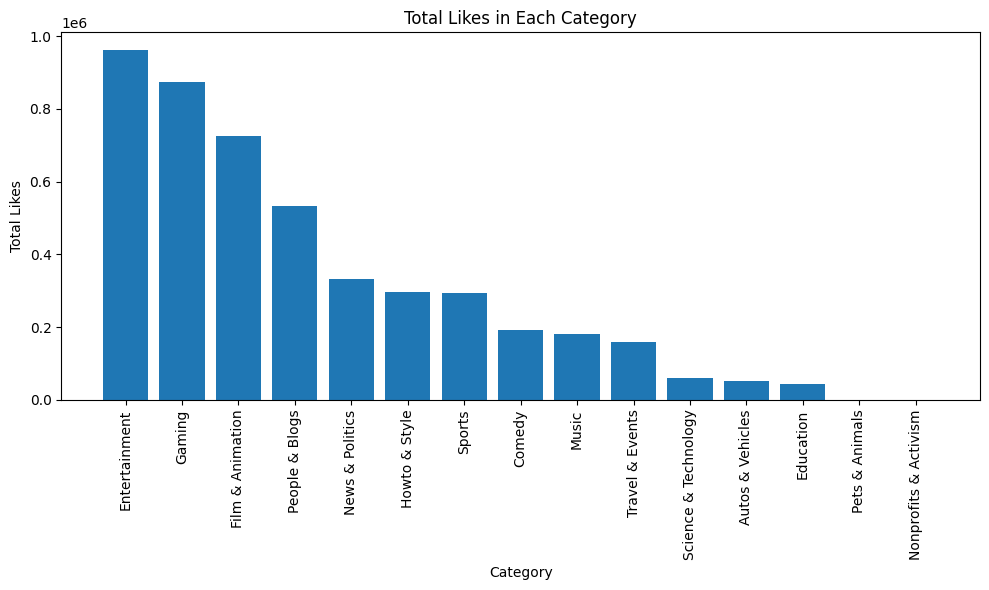

In [24]:
# Create a new DataFrame with the category names and their corresponding total likes
category_likes_df = pd.DataFrame({'Category': category_likes.index, 'Total Likes': category_likes.values})
# Sort the DataFrame by 'Total Likes' in descending order
category_likes_df = category_likes_df.sort_values(by='Total Likes', ascending=False)

# Create a bar graph for total likes per category
plt.figure(figsize=(10, 6))
plt.bar(category_likes_df['Category'], category_likes_df['Total Likes'])
plt.xlabel('Category')
plt.ylabel('Total Likes')
plt.title('Total Likes in Each Category')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the bar graph to a file (e.g., save it as a PNG image)
plt.savefig('output/likes_per_category_bar_graph.png')

# Display the bar graph
plt.show()

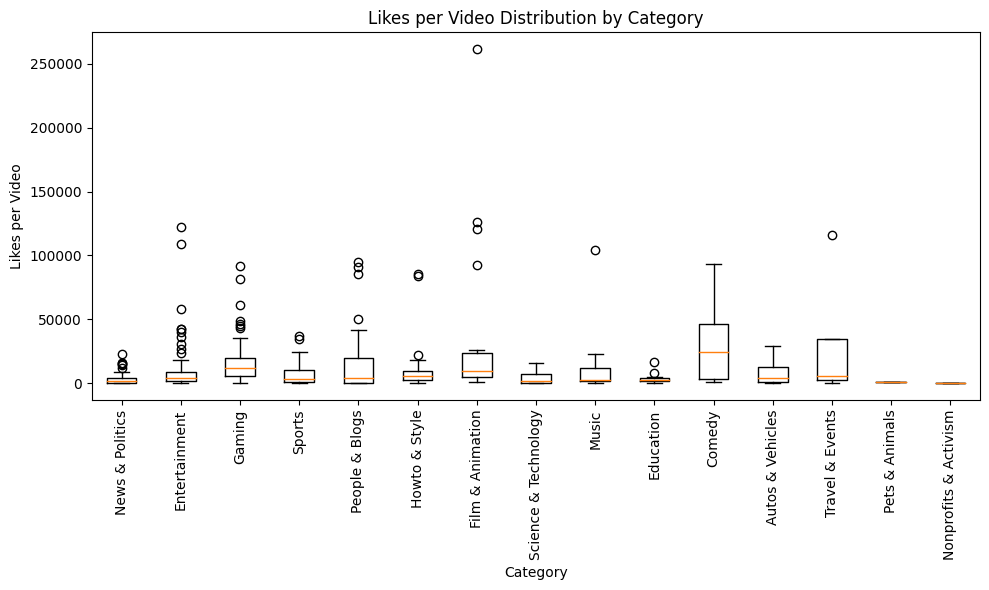

In [25]:
# Box and whisker plot for likes per video
plt.figure(figsize=(10, 6))
plt.boxplot([file[file['Category'] == category]['Likes'] for category in category_counts_df['Category']])
plt.xlabel('Category')
plt.ylabel('Likes per Video')
plt.title('Likes per Video Distribution by Category')
plt.xticks(range(1, len(category_counts_df) + 1), category_counts_df['Category'], rotation=90)
plt.tight_layout()

# Save the boxplot to a file (e.g., save it as a PNG image)
plt.savefig('output/likes_per_video_boxplot.png')

# Display the boxplot
plt.show()